In [147]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
import json
import math

In [175]:
def eval_and_plot_roc(preds, t_labels, legend=["in", "out"]):
    fpr, tpr, _ = metrics.roc_curve(t_labels, preds, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    acc = np.max(1 - (fpr + (1 - tpr))/2)
    low = tpr[np.where(fpr<.01)[0][-1]]

    print("AUC: %.3f, ACC: %.3f, TPR@1%%FPR: %.3f" % (auc, acc, low))

    plt.figure(figsize=(16, 5))

    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color="cornflowerblue", lw=2, label="AUC=%0.3f, TPR@1%%FPR=%0.3f" % (auc, low))
    plt.plot([0, 1], [0, 1], color="lightgray", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve (Normal Scale)")
    plt.legend(loc="lower right")

    plt.subplot(1, 3, 2)
    plt.plot(fpr, tpr, color="cornflowerblue", lw=2, label="AUC=%0.3f, TPR@1%%FPR=%0.3f" % (auc, low))
    plt.plot([0, 1], [0, 1], color="lightgray", lw=2, linestyle="--")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([0.001, 1.0])
    plt.ylim([0.001, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve (Log Scale)")
    plt.legend(loc="lower right")

    preds = np.array(preds)
    t_labels = np.array(t_labels)
    plt.subplot(1, 3, 3)
    sns.histplot(preds[t_labels == 0], color="cornflowerblue", kde=True, label=legend[0])
    sns.histplot(preds[t_labels == 1], color="indianred", kde=True, label=legend[1])
    plt.xlabel("Metric")
    plt.ylabel("Frequency")
    # plt.xlim([min(preds), max(preds)])
    plt.title("Distribution of Predictions")
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()


In [188]:
with open("../mia_outputs/tiny-llama-1.1b-cosmopedia-neptune-step-00068000-cosmopedia-train.jsonl") as f:
    in_data = [json.loads(line) for line in f]

with open("../mia_outputs/tiny-llama-1.1b-cosmopedia-neptune-step-00068000-cosmopedia-val.jsonl") as f:
    out_data = [json.loads(line) for line in f]

AUC: 0.537, ACC: 0.533, TPR@1%FPR: 0.009


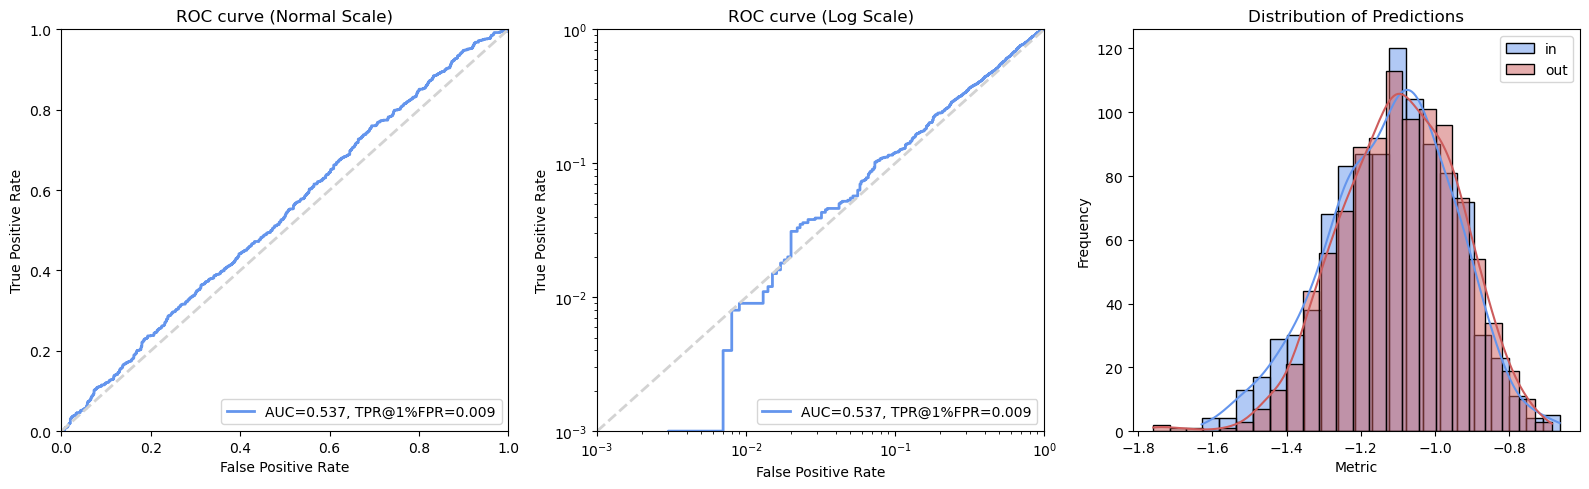

In [189]:
### loss
%matplotlib inline
preds = [i["loss"] for i in in_data] + [i["loss"] for i in out_data]
t_labels = len(in_data) * [1] + len(out_data) * [0]
preds = np.nan_to_num(preds, nan=np.finfo(np.float32).max, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)

eval_and_plot_roc(preds, t_labels)

AUC: 0.559, ACC: 0.544, TPR@1%FPR: 0.014


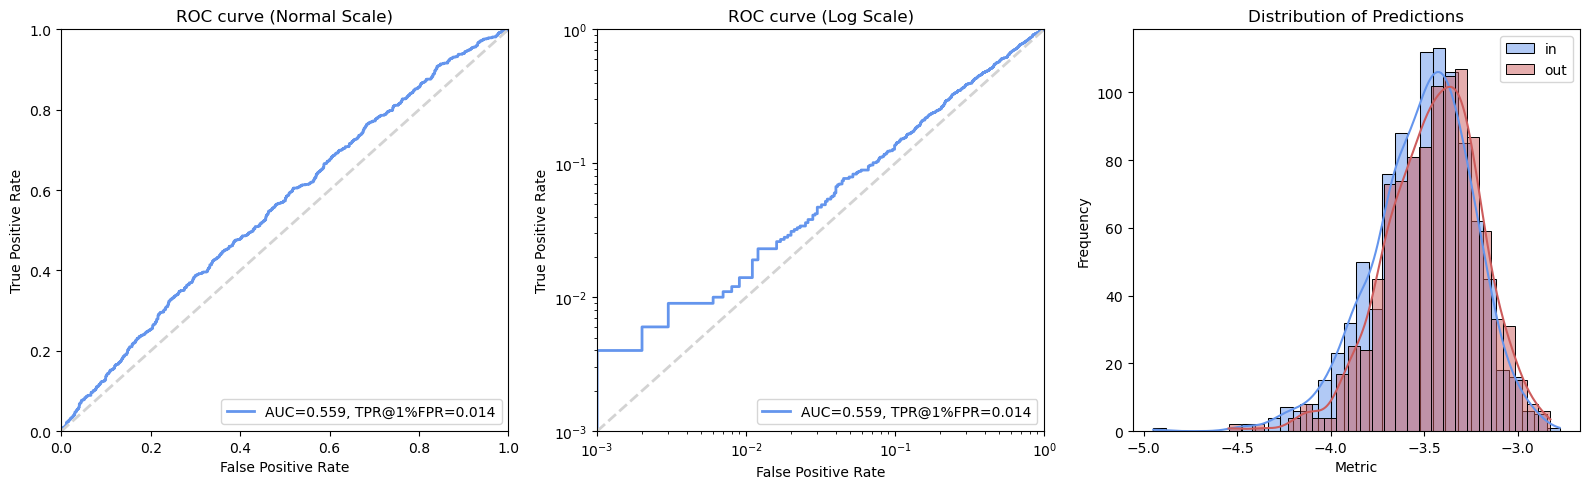

In [190]:
### grad_norm
%matplotlib inline
preds = [i["grad_norm"] for i in in_data] + [i["grad_norm"] for i in out_data]
t_labels = len(in_data) * [1] + len(out_data) * [0]
preds = np.nan_to_num(preds, nan=np.finfo(np.float32).max, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)

eval_and_plot_roc(preds, t_labels)

AUC: 0.540, ACC: 0.536, TPR@1%FPR: 0.005


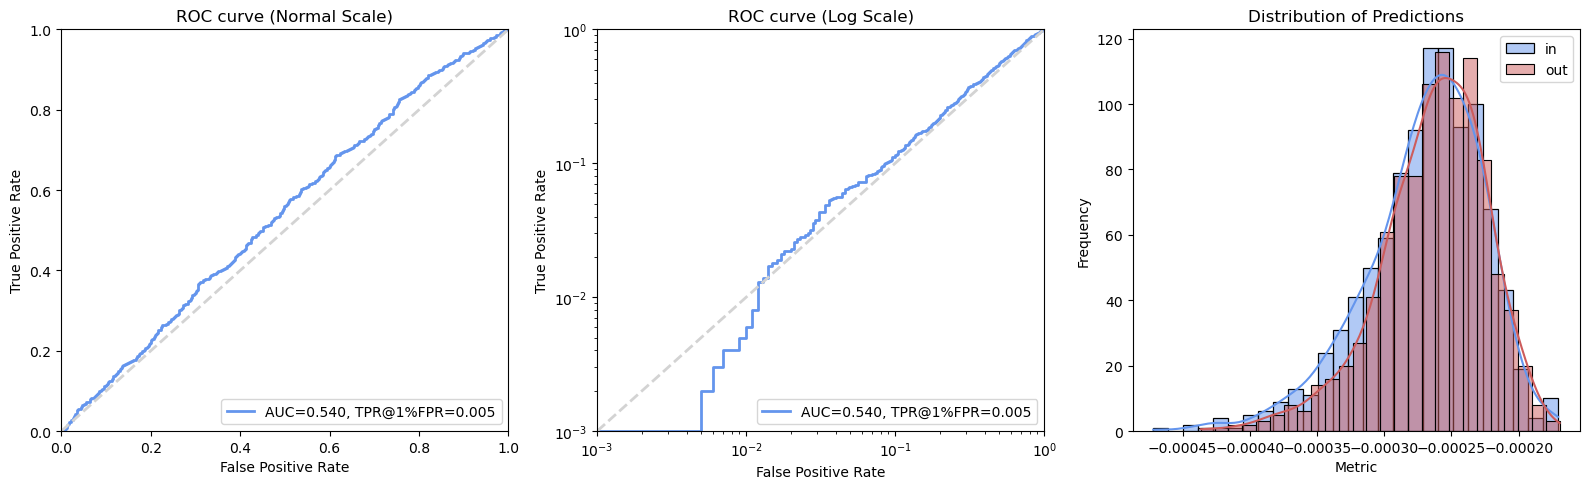

In [191]:
### zlip
%matplotlib inline
preds = [i["zlip"] for i in in_data] + [i["zlip"] for i in out_data]
t_labels = len(in_data) * [1] + len(out_data) * [0]
preds = np.nan_to_num(preds, nan=np.finfo(np.float32).max, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)

eval_and_plot_roc(preds, t_labels)

In [192]:
# ### ref
# %matplotlib inline
# preds = [i["ref"] for i in in_data] + [i["ref"] for i in out_data]
# t_labels = len(in_data) * [1] + len(out_data) * [0]

# eval_and_plot_roc(preds, t_labels)

In [187]:
### calculate exposure
in_data_losses = [-i["zlip"] for i in in_data]
out_data_losses = [-i["zlip"] for i in out_data]
combined_losses = in_data_losses + out_data_losses
sorted_list = sorted(combined_losses)

first_term = math.log(len(combined_losses), 2)

indiv_exposures = []
for curr_loss in in_data_losses:
    index = sorted_list.index(curr_loss)
    indiv_exposures.append(first_term - math.log(index + 1, 2))

print("Exposure =", sum(indiv_exposures)/len(indiv_exposures))

Exposure = 1.5088420086017733
